In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def problem_1():
    series_1 = pd.Series(-3, index=np.linspace(2,10,num=5,dtype=int))
    d = {'Bill': 31, 'Sarah':28, 'Jane':34, 'Joe':26}
    series_2 = pd.Series(d)
    return series_1, series_2

s1, s2 = problem_1()
print (s1, '\n')
print(s2)

2    -3
4    -3
6    -3
8    -3
10   -3
dtype: int64 

Bill     31
Jane     34
Joe      26
Sarah    28
dtype: int64


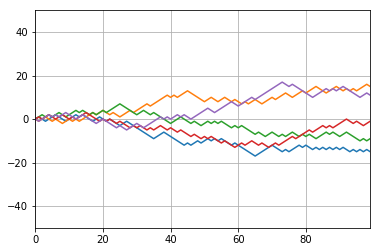

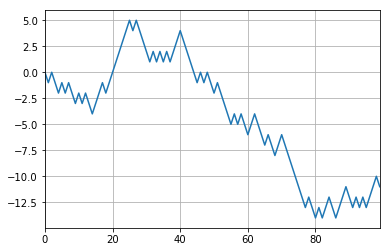

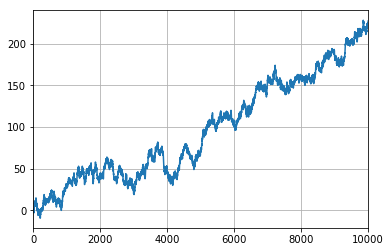

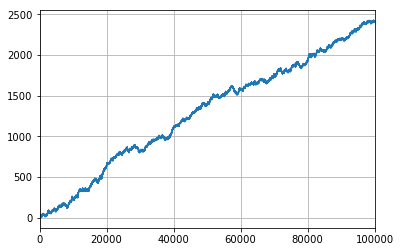

In [20]:
def problem_2_five_walks():
    N = 100
    s = np.zeros(N)
    for i in range(1,6):
        s[1:] = np.random.binomial(1,.5,size=(N-1,))*2-1
        s = pd.Series(s)
        s = s.cumsum()
        s.plot()
        plt.ylim([-50,50])
        plt.grid()
    plt.show()
    
def problem_2_biased():
    N = np.array([100,10000,100000])
    for i in range(3):
        s = np.zeros(N[i])
        s[1:] = np.random.binomial(1,.51,size=(N[i]-1))*2-1
        s = pd.Series(s)
        s = s.cumsum()
        s.plot()
        plt.grid()
        plt.show()
    
problem_2_five_walks()
problem_2_biased()

In [26]:
name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt',
'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age,
'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major})

In [27]:
def problem_3():
    return studentInfo[(studentInfo['Age']>19)&(studentInfo['Sex']=='M')][['ID', 'Name']]
print(problem_3())

   ID   Name
0   0  Mylan
6   6   Matt


In [32]:
def problem_4():
    return pd.merge(studentInfo[studentInfo['Sex']=='M'],otherInfo,on='ID',how='left')[['ID', 'GPA', 'Age']]
print(problem_4())

   ID  GPA  Age
0   0  3.8   20
1   2  3.0   18
2   4  2.8   19
3   6  3.8   20
4   7  3.4   19


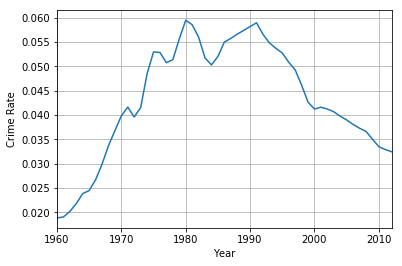

5 years with highest crime rates: [1980 1991 1981 1990 1989]
Total Crimes: 10638068.0755
Burglary Crimes: 2446286.20755
Years with above average burglary and below average total crime: [1973 1974]


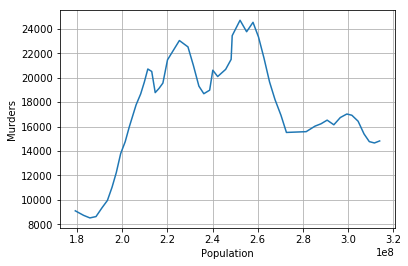

      Population  Violent  Robbery
Year                              
1980   225349264  1344520   565840
1981   229146000  1361820   592910
1982   231534000  1322390   553130
1983   233981000  1258090   506570
1984   236158000  1273280   485010
1985   238740000  1328800   497870
1986   240132887  1489169   542775
1987   242282918  1483999   517704
1988   245807000  1566220   542970
1989   248239000  1646040   578330


In [65]:
def problem_5():
    df = pd.read_csv("/Users/rubyzhang/Desktop/UChicago/OSML/BootCamp2017/Computation/Wk2_VisPandas/crime_data.txt",delimiter=',',header=1,index_col='Year')
    df['Crime Rate'] = df['Total']/df['Population']
    
    df['Crime Rate'].plot()
    plt.ylabel('Crime Rate')
    plt.xlabel('Year')
    plt.grid()
    plt.show()
    
    df_high = np.array(df.sort_values('Crime Rate', ascending=False).iloc[:5].index)
    print('5 years with highest crime rates:', df_high)
    
    data = df.describe()
    tot_crime = data.at['mean','Total']
    burg = data.at['mean','Burglary']
    
    print('Total Crimes:', tot_crime)
    
    print('Burglary Crimes:', burg)
    
    years = np.array(df[(df['Total']<tot_crime)&(df['Burglary']> burg)].index)
    
    print('Years with above average burglary and below average total crime:', years)
    
    plt.plot(np.array(df['Population']),np.array(df['Murder']))
    plt.ylabel('Murders')
    plt.xlabel('Population')
    plt.grid()
    plt.show()
    
    df_sub = df[['Population', 'Violent', 'Robbery']].loc[1980:1989,:]
    df_sub.to_csv('crime_subset.txt')
    
    print(df_sub)
problem_5()